In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d 
import os
import freud
# loading all of the csv's from all of the simulations with the macro measured data (total energy, ent. excess, Paccept....)
simlist = []
datafiles = []
csvfiles = []
for root, dirs, files in os.walk("../data/gfield2"):
    for file in files:
        if file.endswith(".npz"):
            datafiles.append(os.path.join(root,file))
        if file.endswith(".csv"):
            csvfiles.append(os.path.join(root,file))
    for name in dirs:
        simlist.append(name)
simlist = sorted(simlist)
datafiles = sorted(datafiles)
csvfiles = sorted(csvfiles)
#assert len(simlist) == len(datafiles) == len(csvfiles)


def load_csv(fname,verbose=True):
    if verbose:
        with open(fname) as f:
            print(f.readline().strip('\n'))
    return np.loadtxt(fname,skiprows=1,delimiter=",")

def plot_energy(fpath,csv1,save=False):
    fig,ax1 = plt.subplots()
    ax1.set_title(fpath.split("/")[-2])
    ax1.plot(csv1[10:,0],csv1[10:,1],label="TotalEnergy")
    ax1.set_xlabel("timesteps")
    ax1.set_ylabel("Total Energy")
    ax1.tick_params(axis ='y', labelcolor="tab:blue")
    #ax2  = ax1.twinx()
    #ax2.plot(csv1[:,0],csv1[:,2],label="Eexcess",color="tab:orange")
    #ax2.set_ylabel("Ent. Excess")
    #ax2.tick_params(axis ='y', labelcolor = "tab:orange")
    #plt.show()
    if save:
        fname = fpath[:-4]+"_energy.png"
        print(fname)
        fig.savefig(fname)
        
%matplotlib ipympl

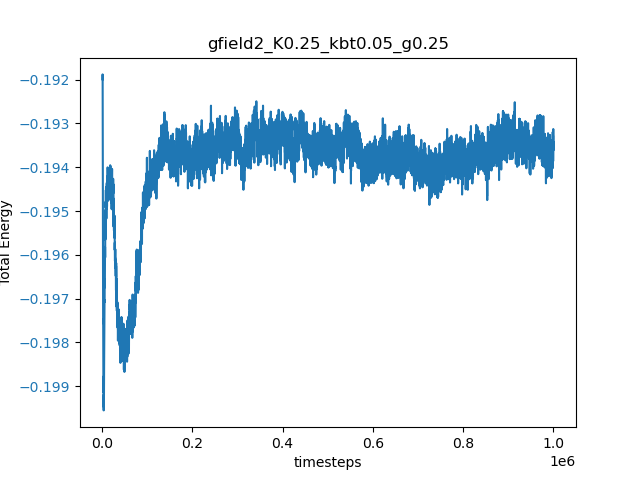

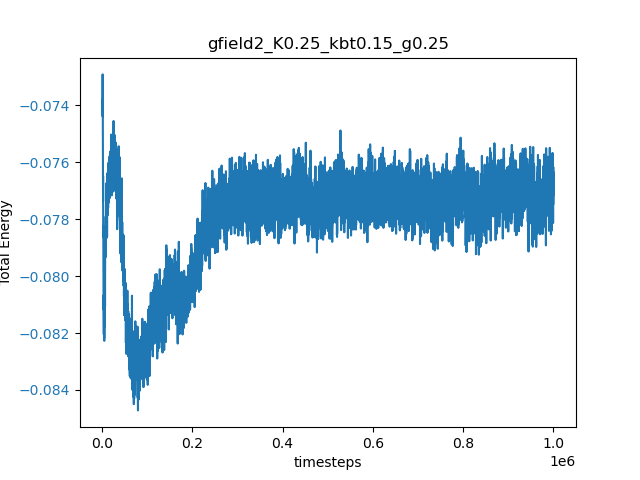

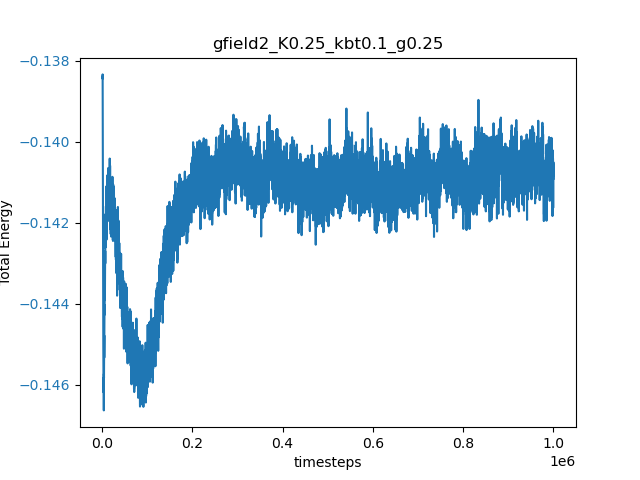

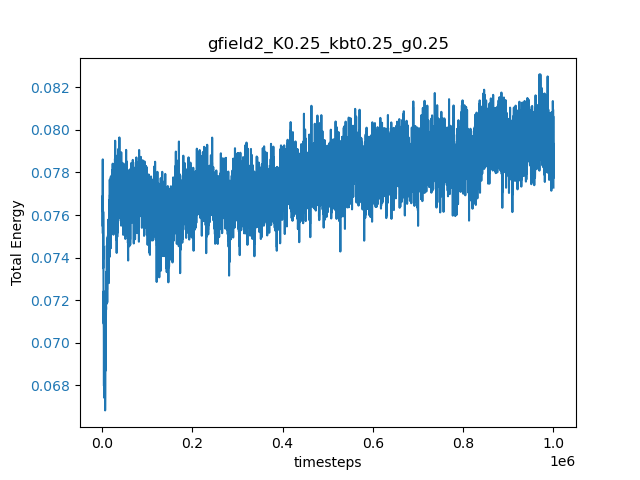

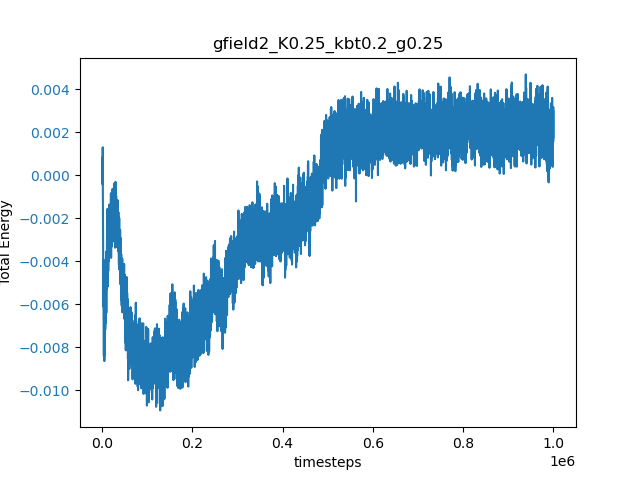

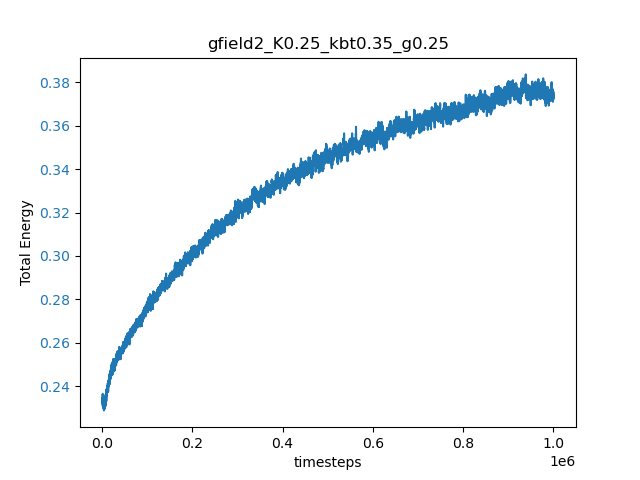

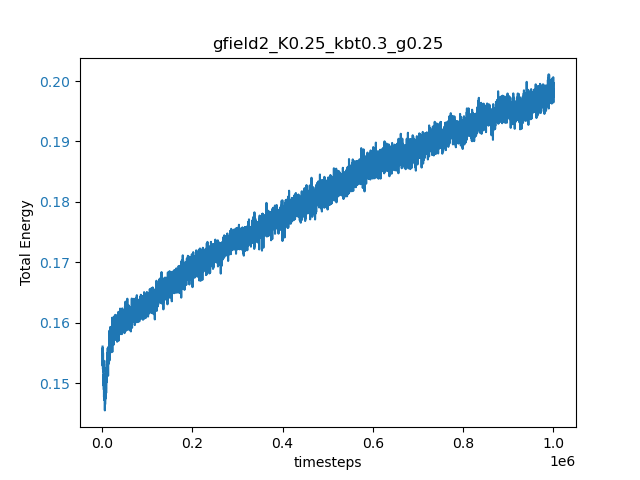

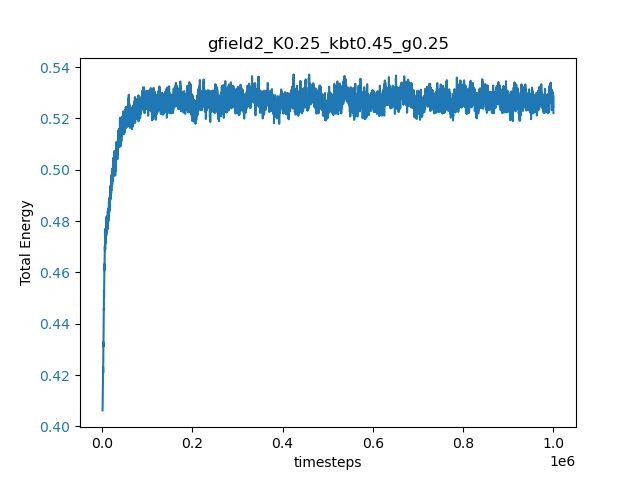

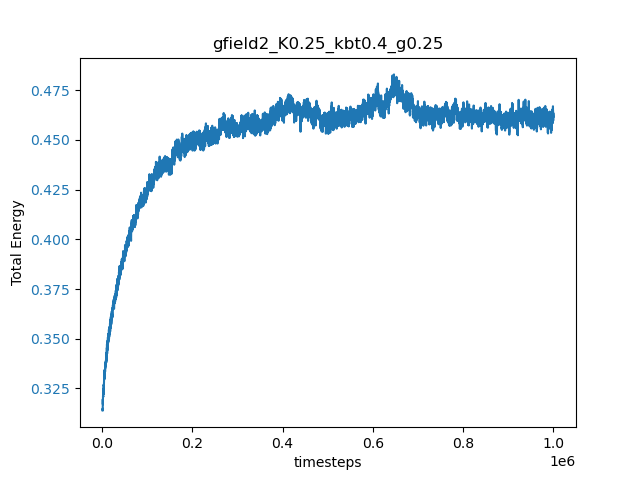

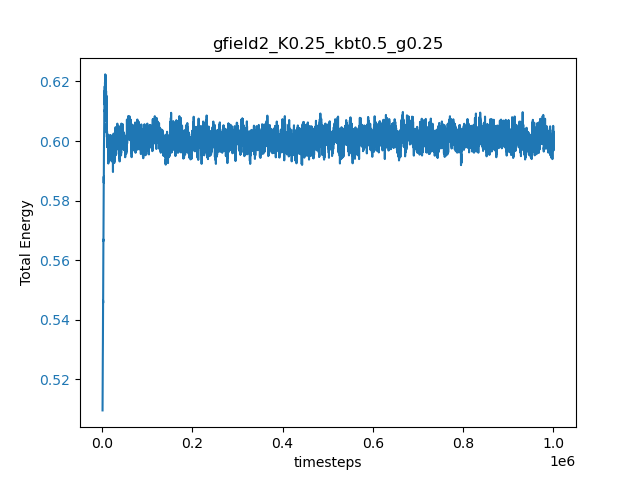

In [3]:
for csvfile in csvfiles:
    csvdata = load_csv(csvfile,verbose=False)
    # K = float(csvfile.split("/")[3].split("_")[-2][1:])
    K = float(csvfile.split("/")[3].split("_")[-3][1:]) # gfield
    g = float(csvfile.split("/")[3].split("_")[-1][1:])
    if K == 0.25 and g == 0.25:
        plot_energy(csvfile,csvdata,save=False)

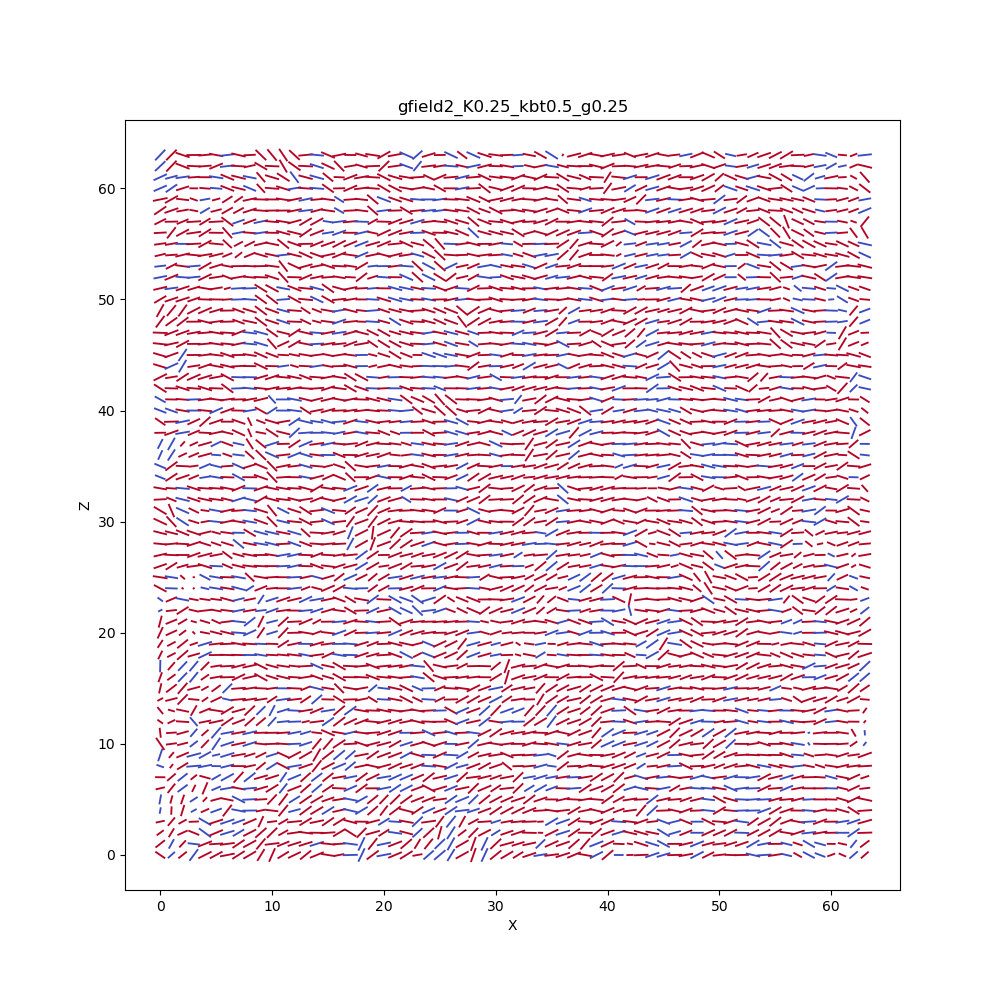

In [4]:
from IPython.display import Image
Image(filename='../data/gfield2/gfield2_K0.25_kbt0.5_g0.25/gfield2_K0.25_kbt0.5_g0.25.png')

Gfield:	 0.0


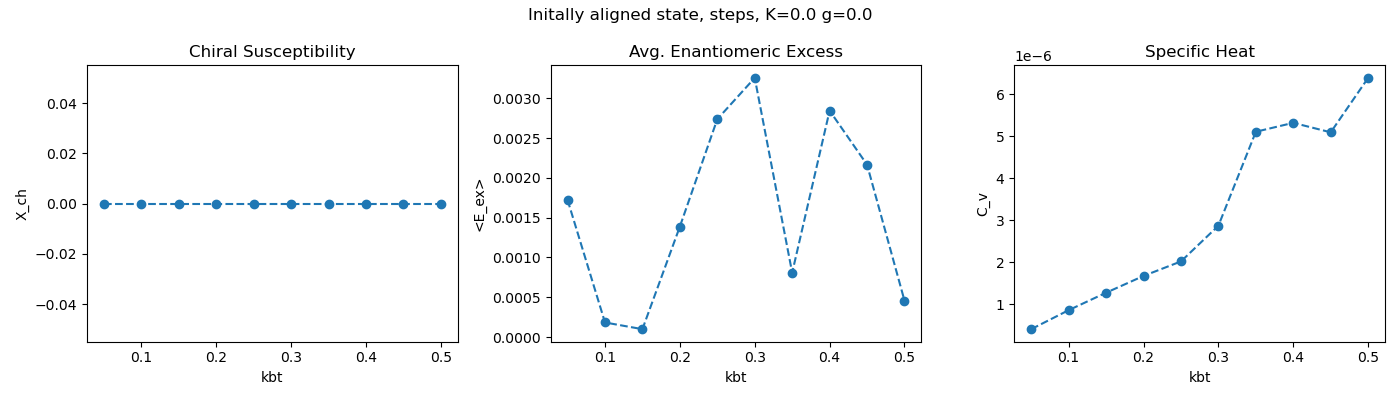

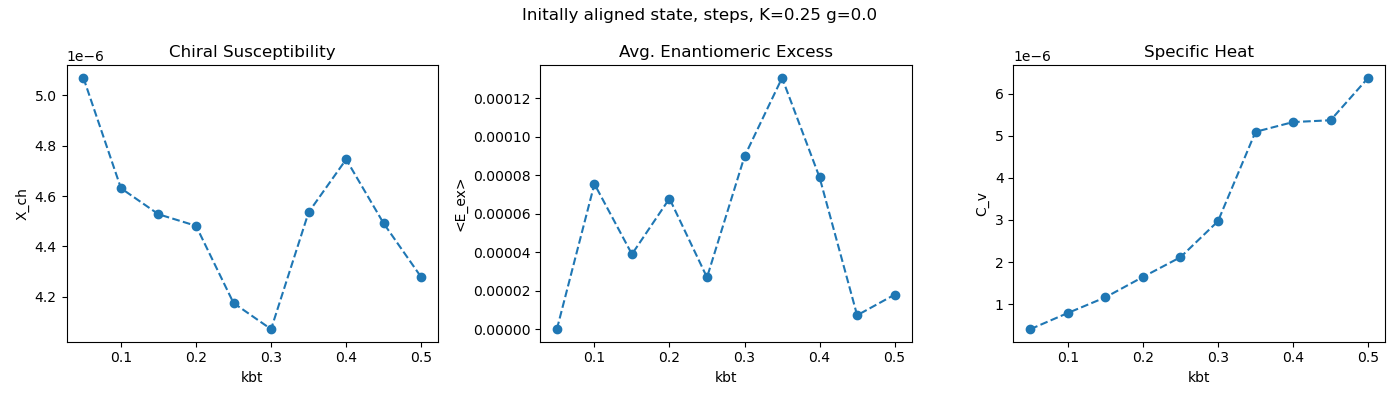

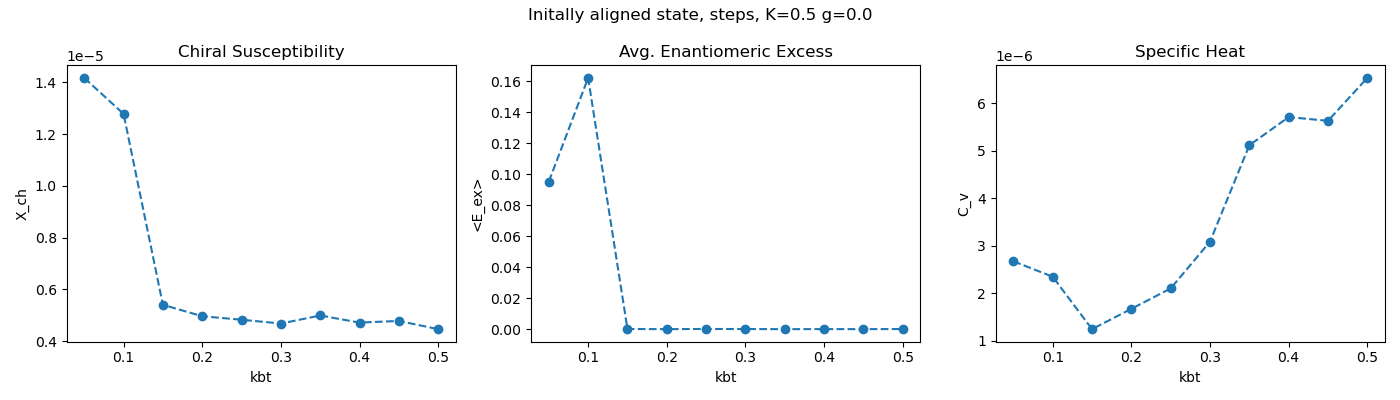

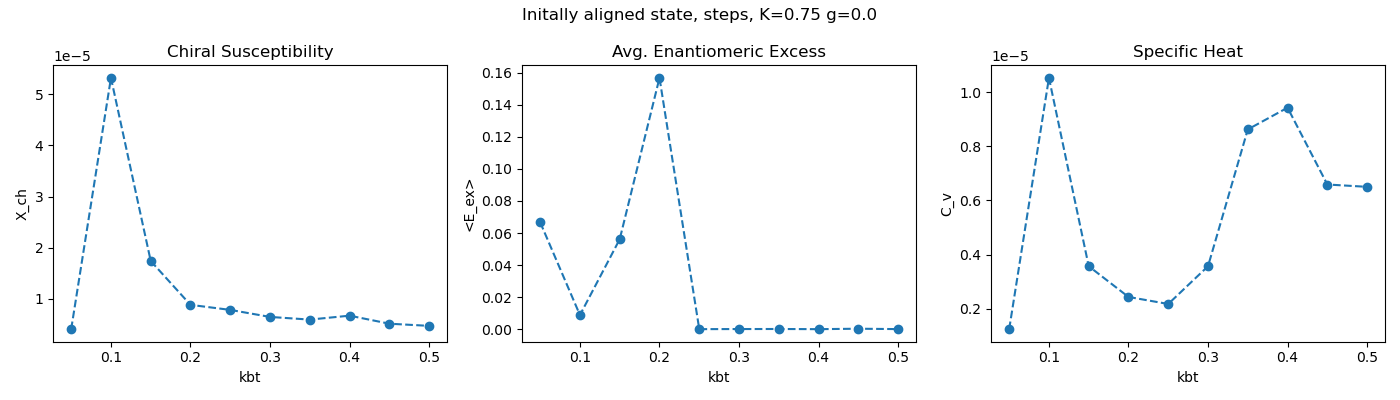

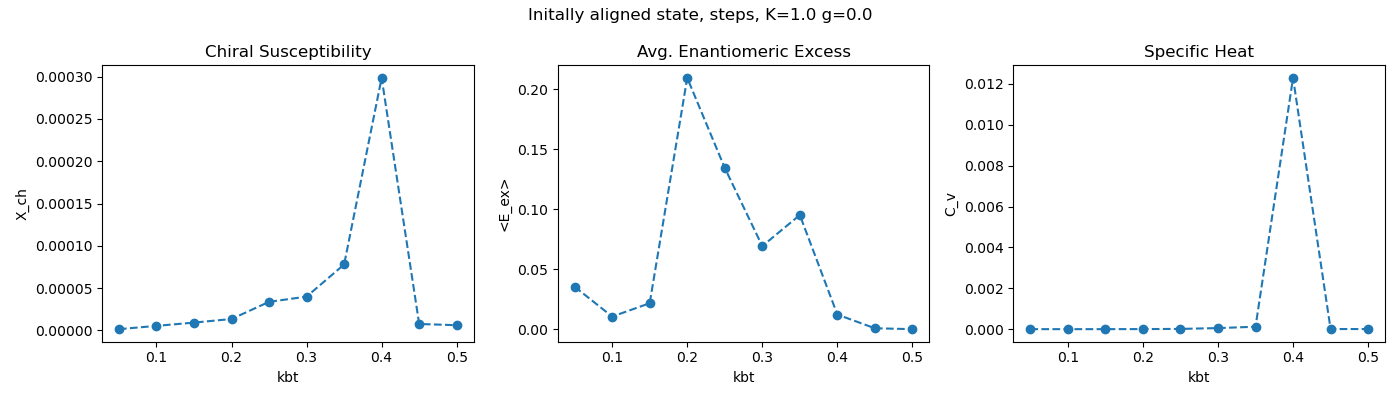

Gfield:	 0.05


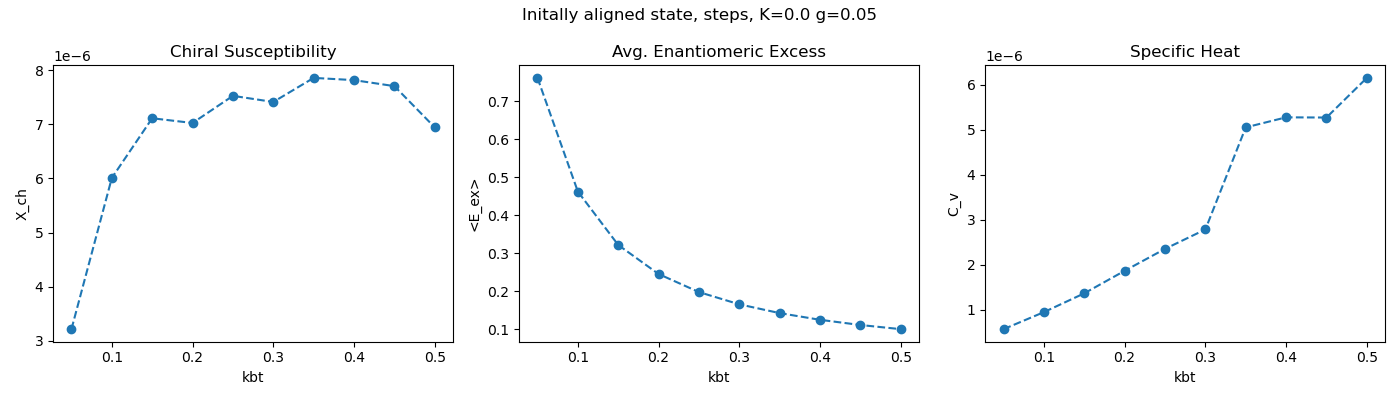

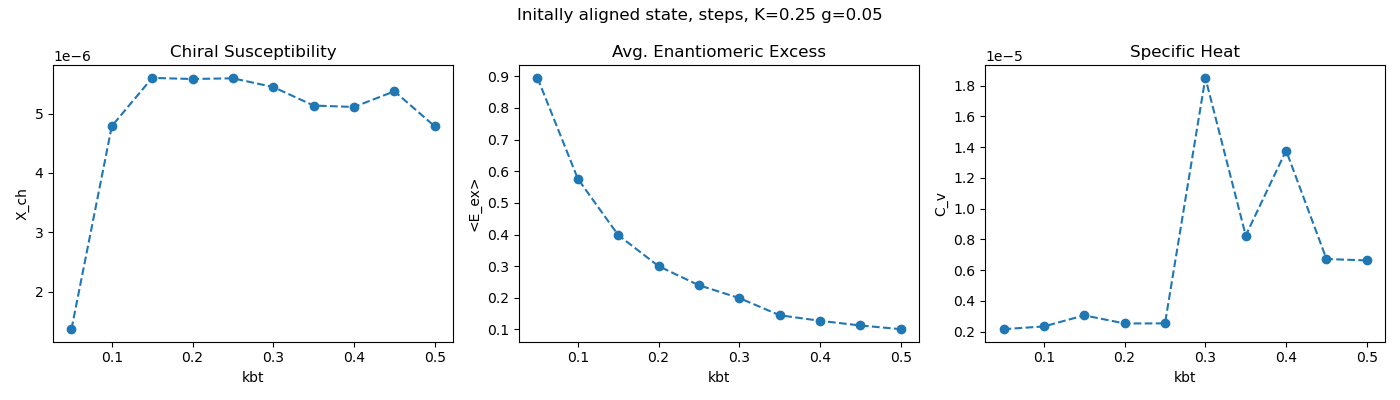

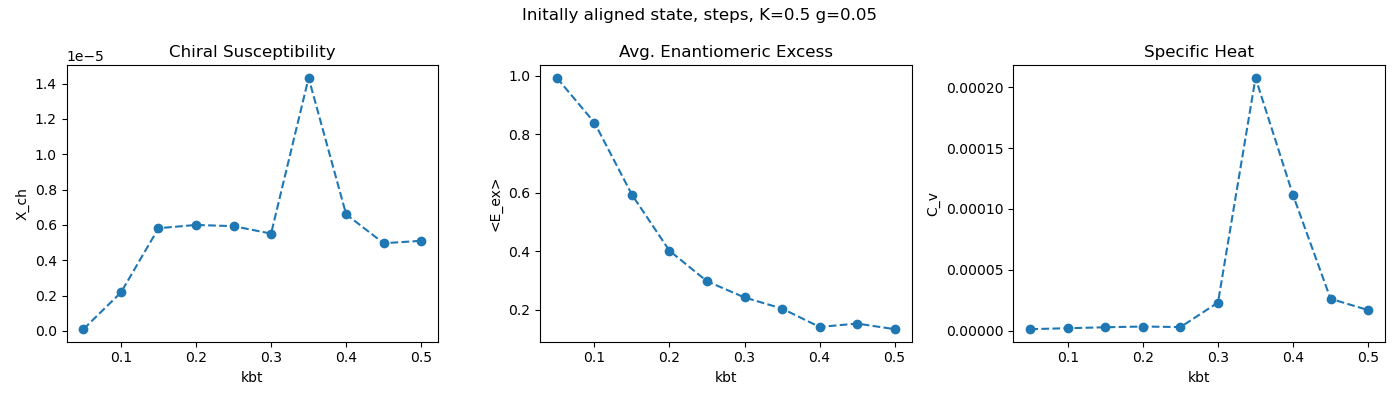

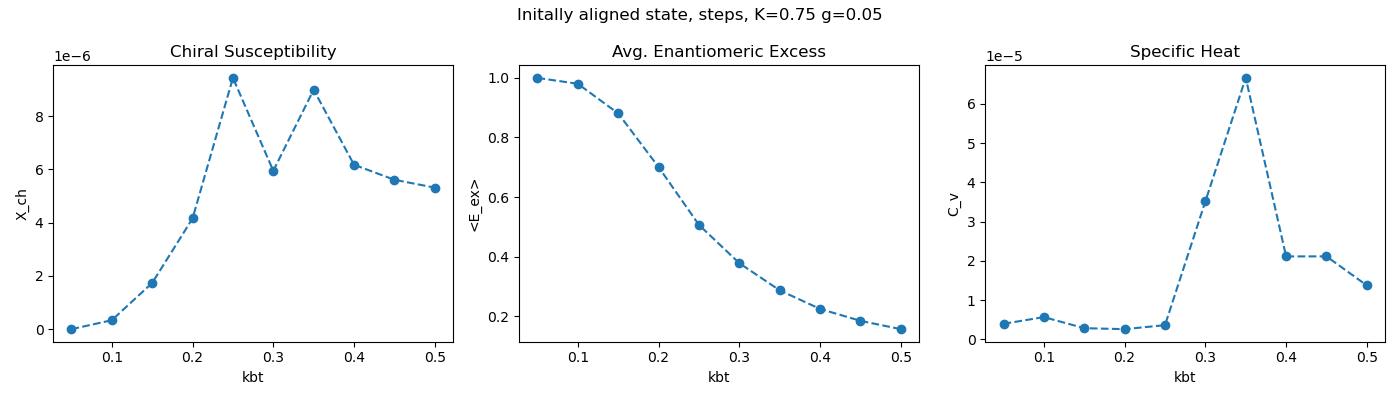

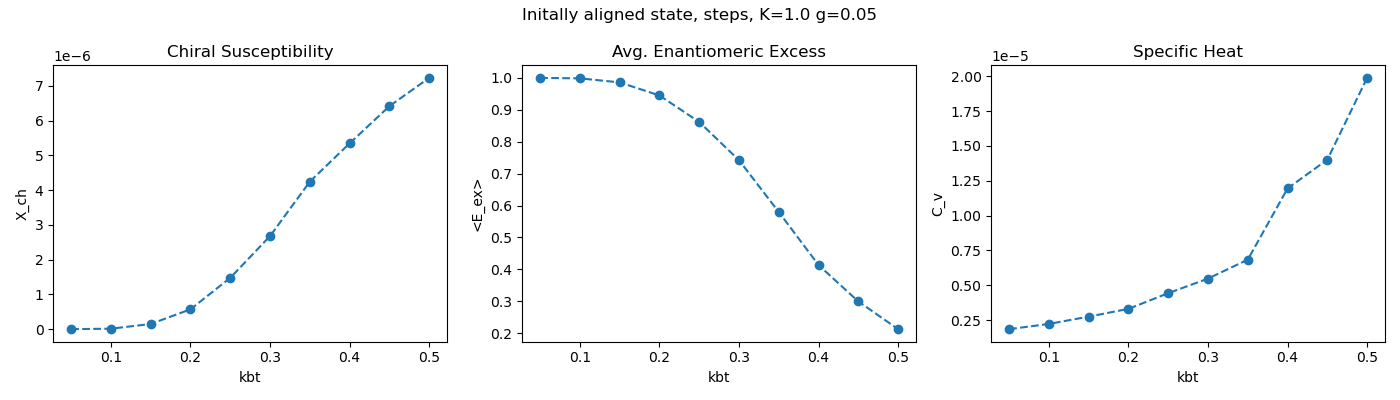

Gfield:	 0.1


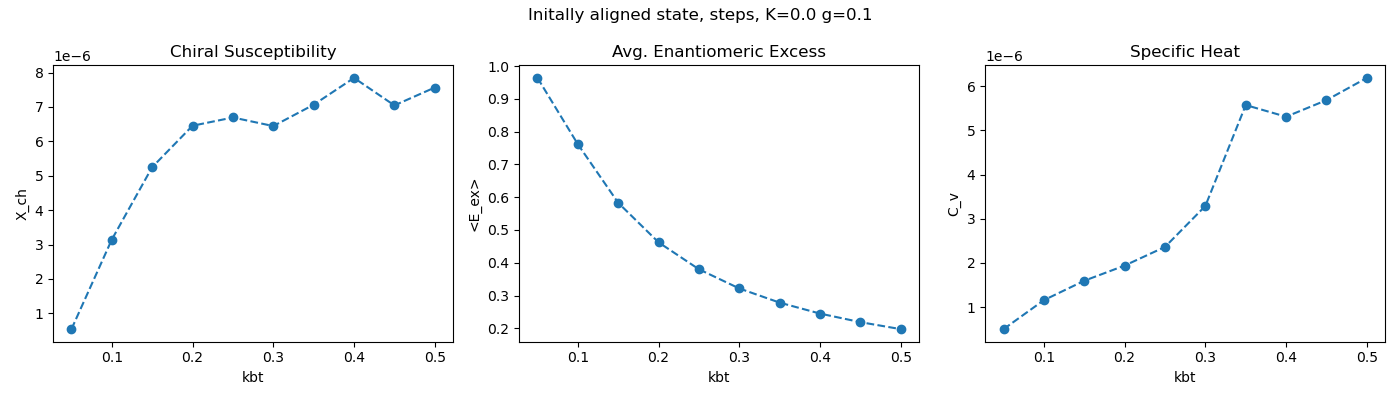

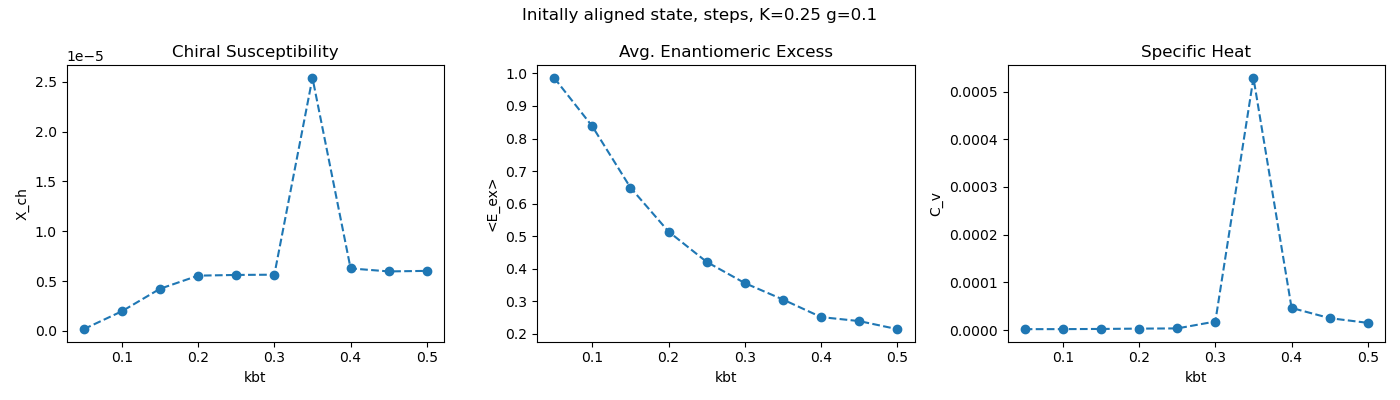

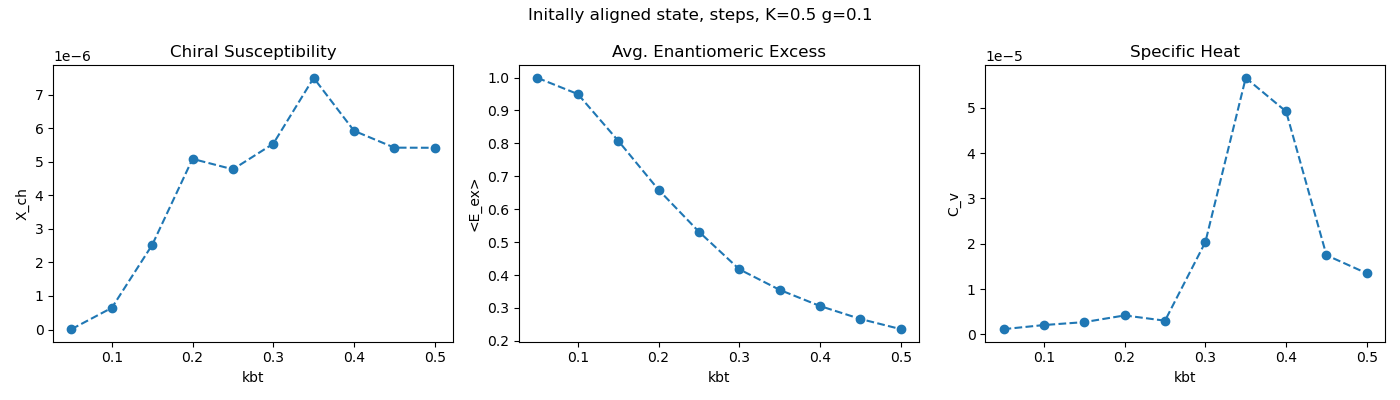

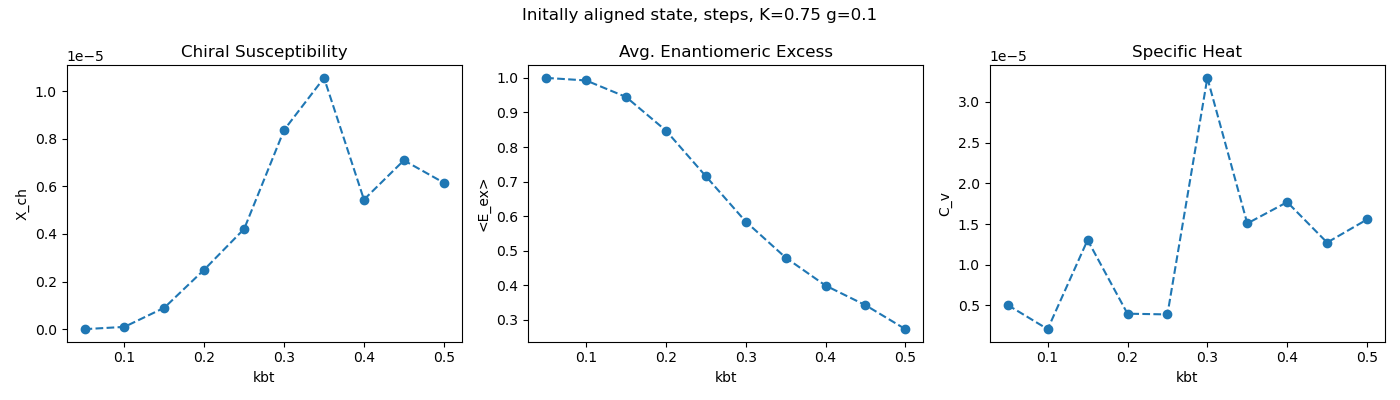

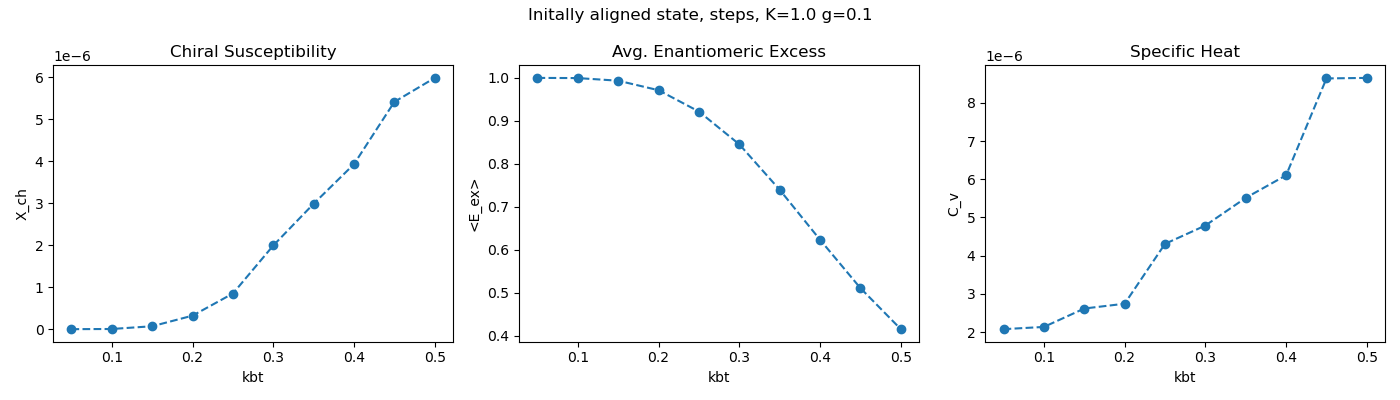

Gfield:	 0.15000000000000002


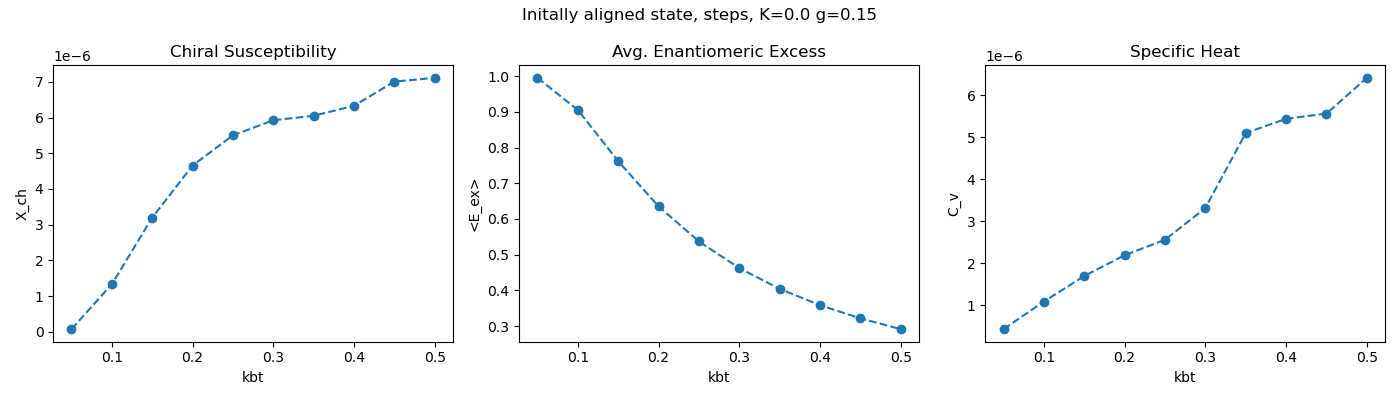

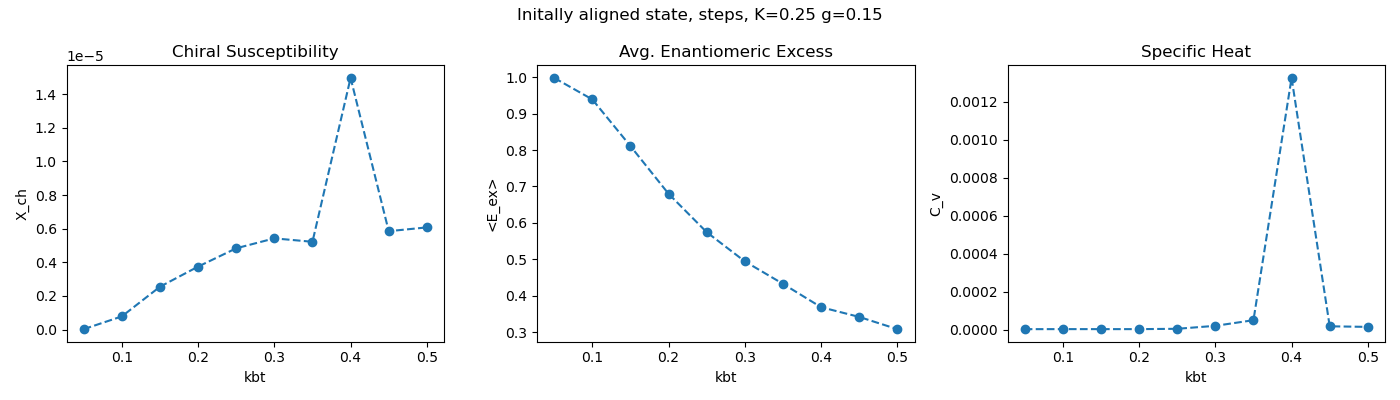

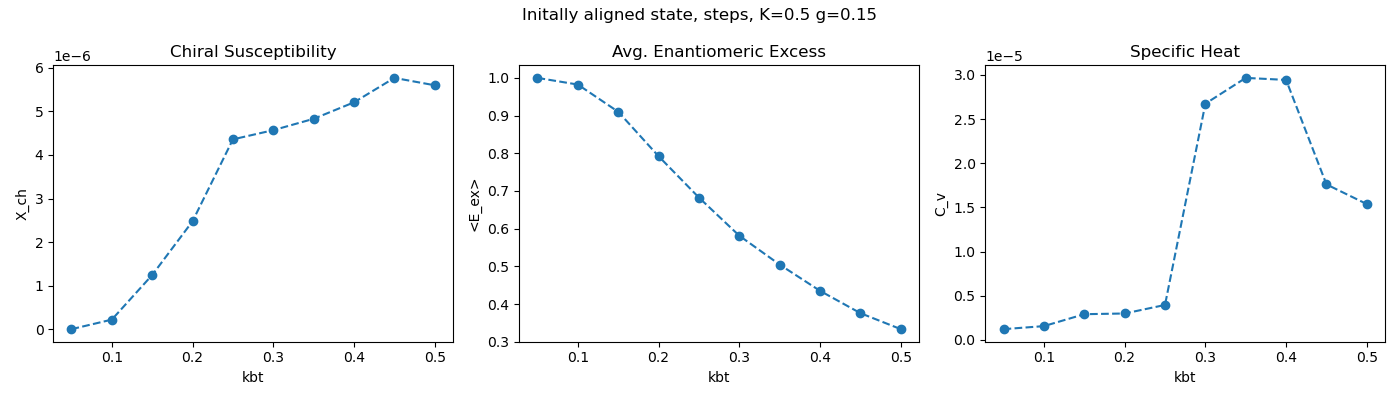

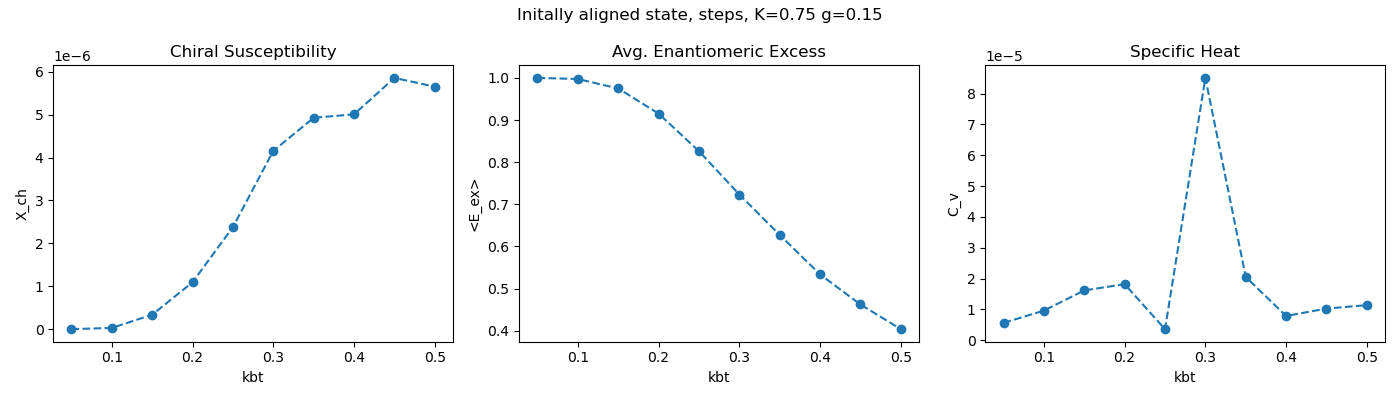

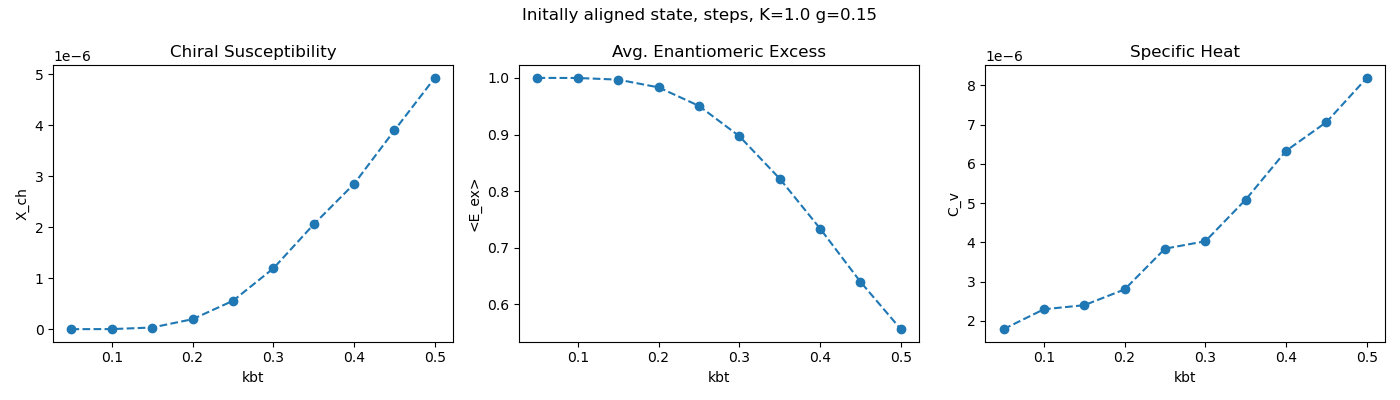

Gfield:	 0.2


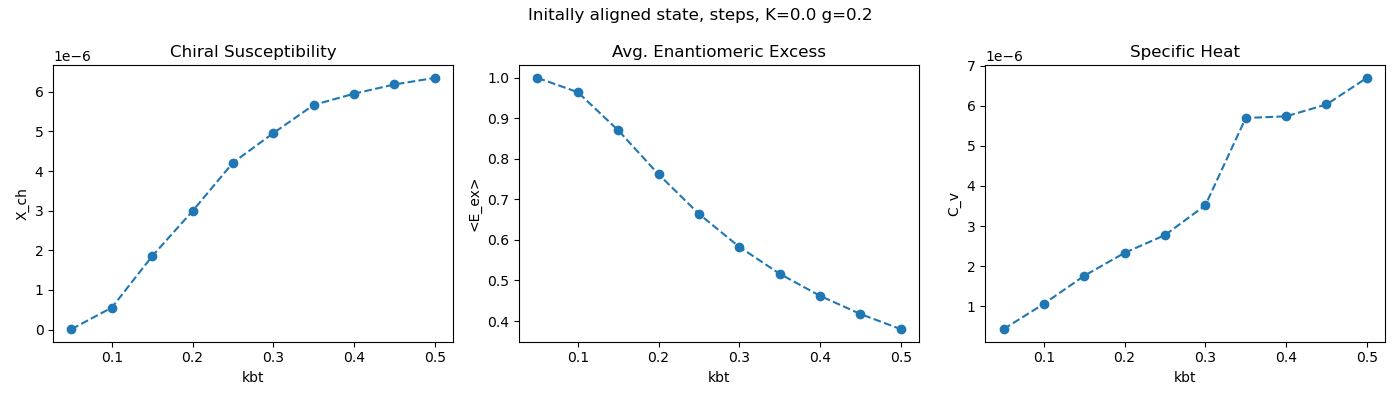

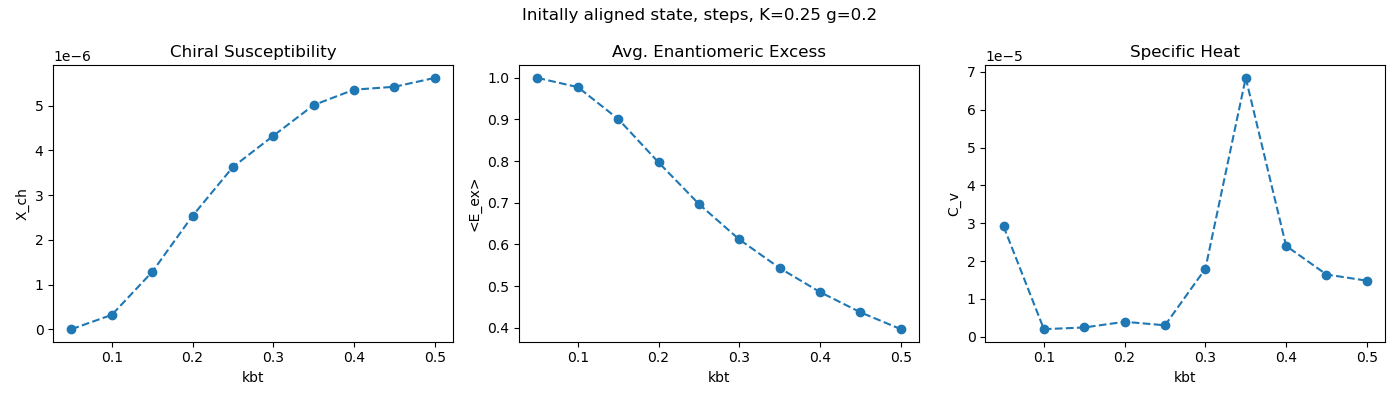

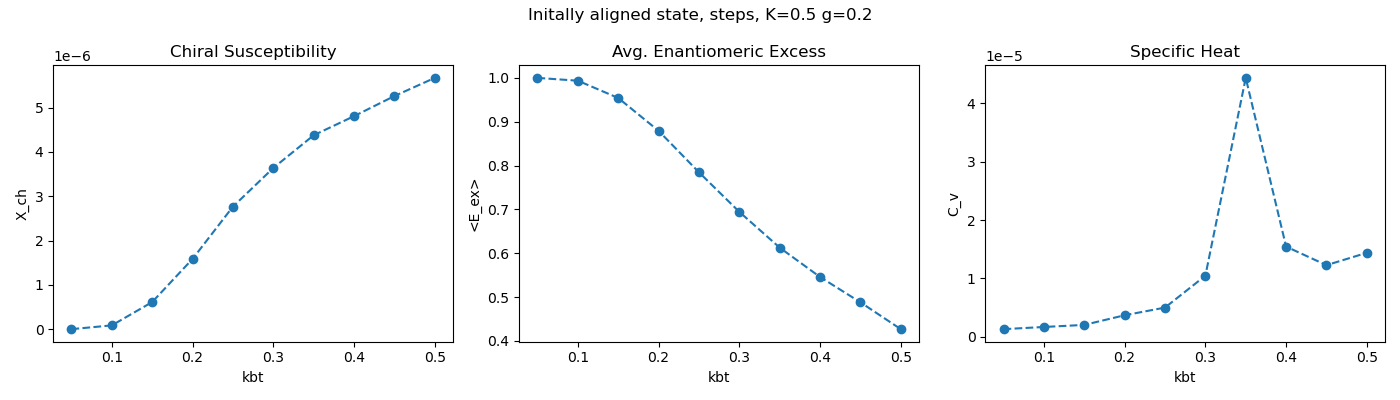

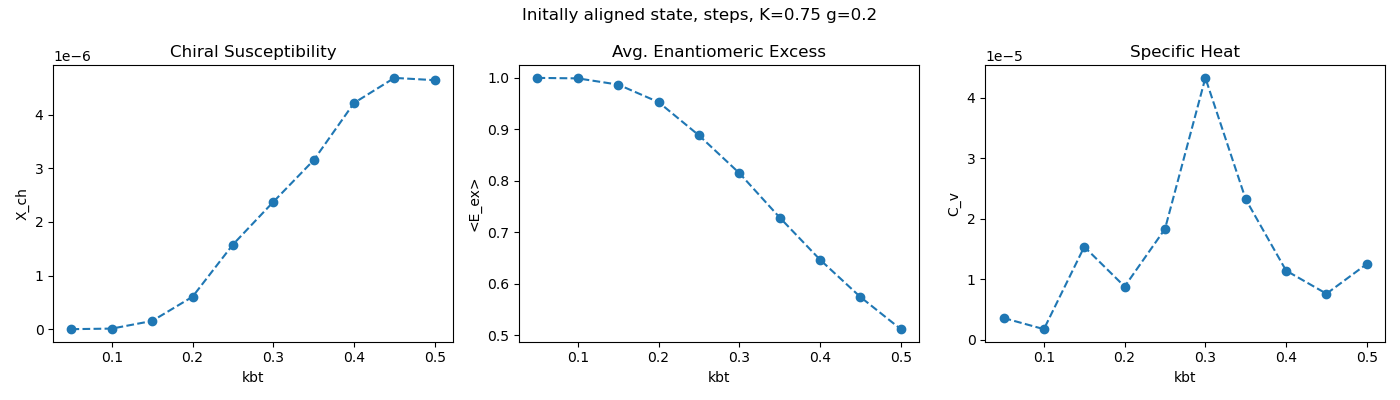

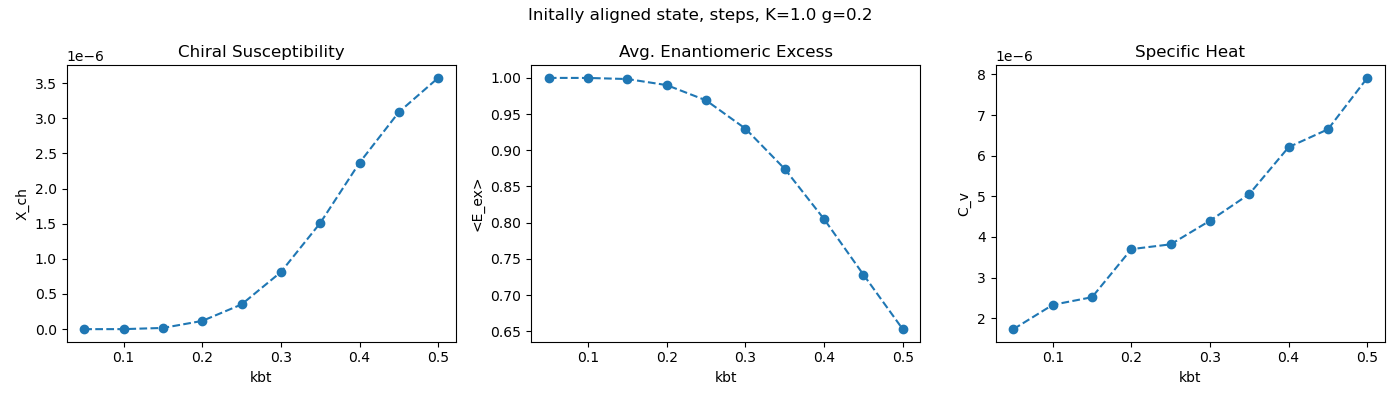

Gfield:	 0.25


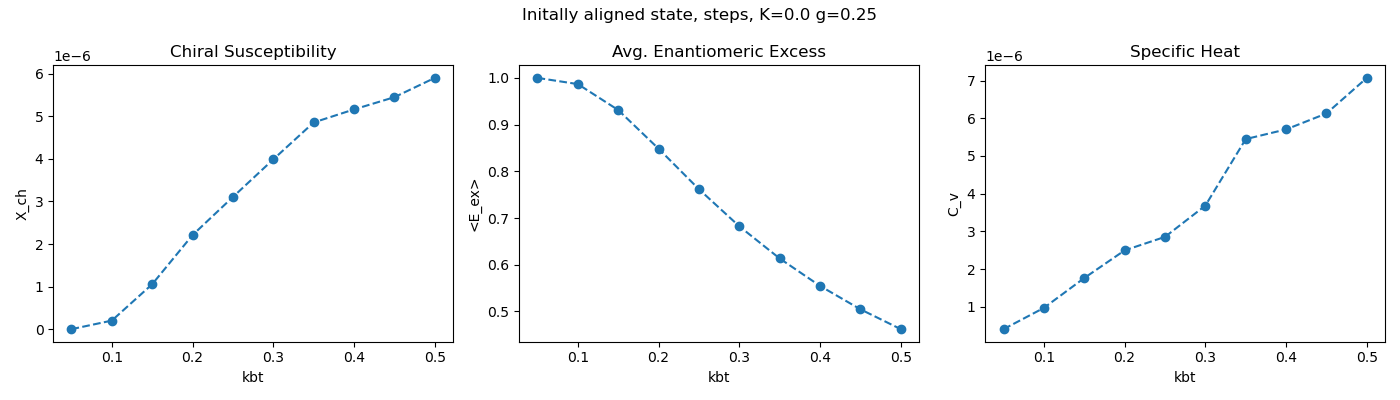

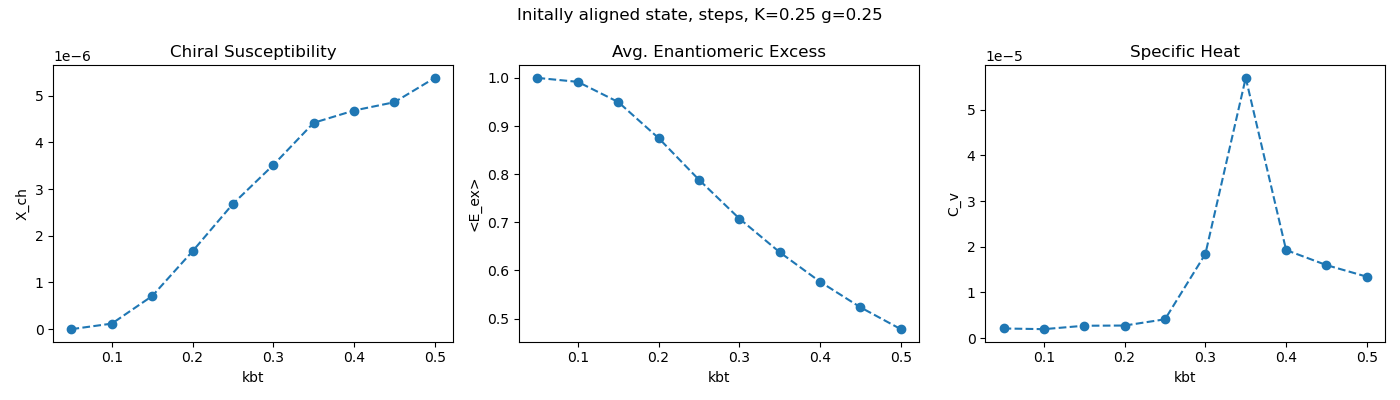

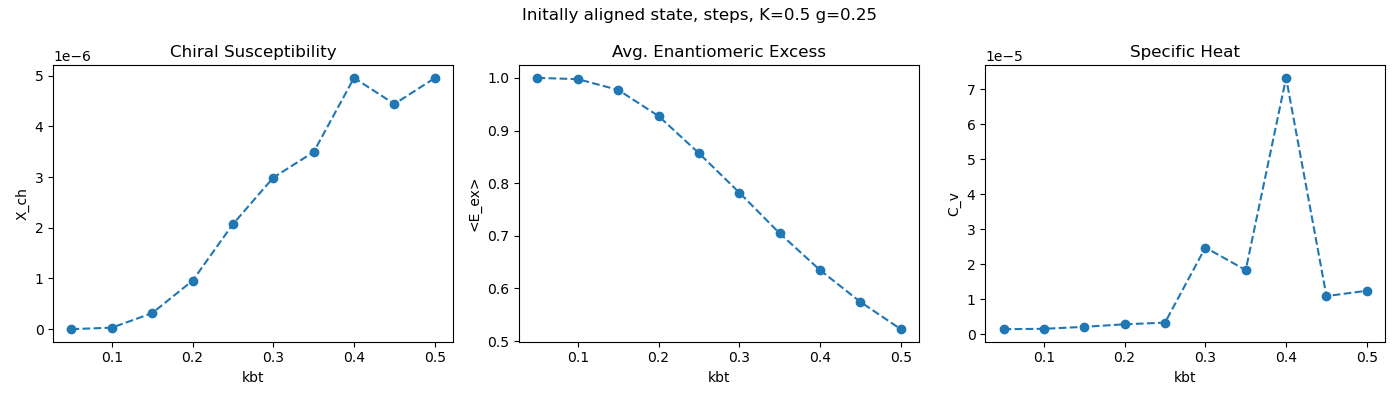

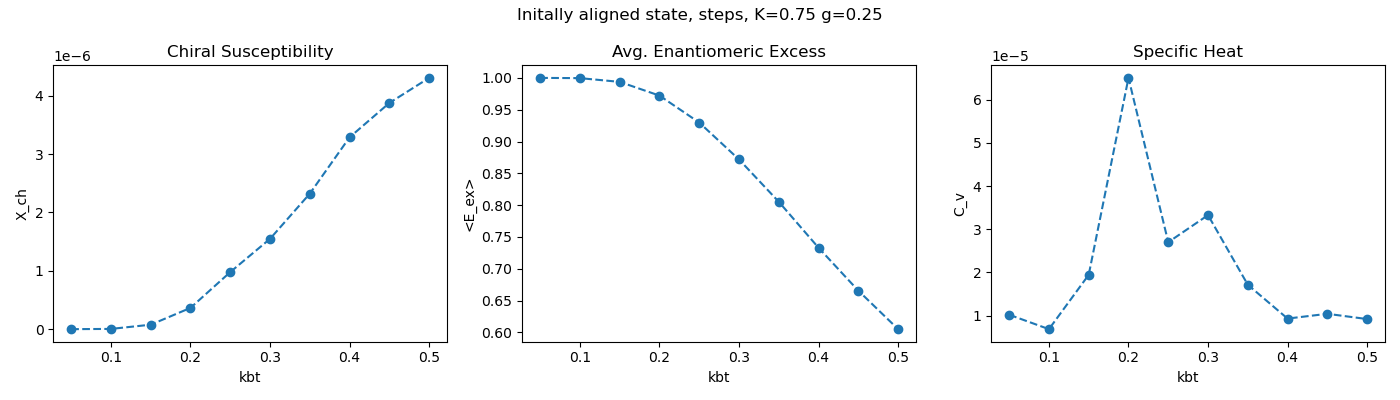

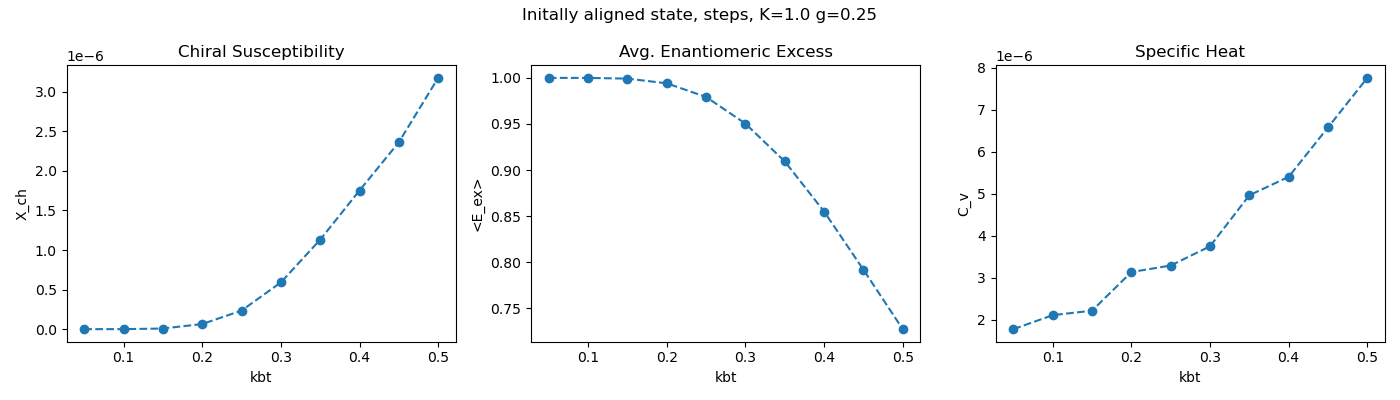

In [17]:
# measuring chiral susceptibility mean(enantionmeric excess^2) - mean(enantiomeric excess^2)
def measure_chi(Kin,gin,init_type="gfield2"):
    ch_sus = []
    kbts = []
    avg_ent = []
    c_v = []
    for csvfile in csvfiles:
        csv1 = load_csv(csvfile,verbose=False)
        K = float(csvfile.split("/")[3].split("_")[-3][1:])
        g = float(csvfile.split("/")[3].split("_")[-1][1:])
        if K == Kin and g == gin and init_type in csvfile:
            kbt = float(csvfile.split("/")[3].split("_")[-2][3:])
            #print(K,g,kbt,csvfile)
            kbts.append(kbt)
            # chiral susceptibility
            excess = csv1[7500:,2]
            ch_sus.append(np.mean(excess**2) - np.mean(excess)**2)
            # average enantiomeric excess
            avg_ent.append(np.abs(np.mean(excess)))
            #specific heat
            E = csv1[7500:,1]
            c_v.append((np.mean(E**2) - np.mean(E)**2)/kbt)

    #note the lists are not sorted, so the plots look weird, sorting here
    zipped = list(zip(kbts,ch_sus,avg_ent,c_v))
    zipped.sort()
    kbts,ch_sus,avg_ent,c_v = zip(*zipped)
    
    fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(14,4))
    fig.suptitle("Initally aligned state, steps, K="+str(Kin)+" g="+str(gin))
    ax1.set_title("Chiral Susceptibility")
    ax1.set_ylabel("X_ch")
    ax1.set_xlabel("kbt")
    ax1.scatter(kbts,ch_sus)
    ax1.plot(kbts,ch_sus,linestyle='dashed')
    #print(kbts,ch_sus,sep="\n")
    
    ax2.set_title("Avg. Enantiomeric Excess")
    ax2.set_ylabel("<E_ex>")
    ax2.set_xlabel("kbt")
    ax2.scatter(kbts,avg_ent)
    ax2.plot(kbts,avg_ent,linestyle='dashed')
    
    ax3.set_title("Specific Heat")
    ax3.set_ylabel("C_v")
    ax3.set_xlabel("kbt")
    ax3.scatter(kbts,c_v)
    ax3.plot(kbts,c_v,linestyle='dashed')
    fig.tight_layout()
    plt.show()
for Gplot in np.arange(0.0,0.251,0.05):
    print("Gfield:\t",Gplot)
    for Kplot in np.arange(0.0,1.1,0.25):
        measure_chi(Kplot,np.around(Gplot,2))

300
../data/gfield2/gfield2_K0.75_kbt0.25_g0.1/gfield2_K0.75_kbt0.25_g0.1_data.npz


[]

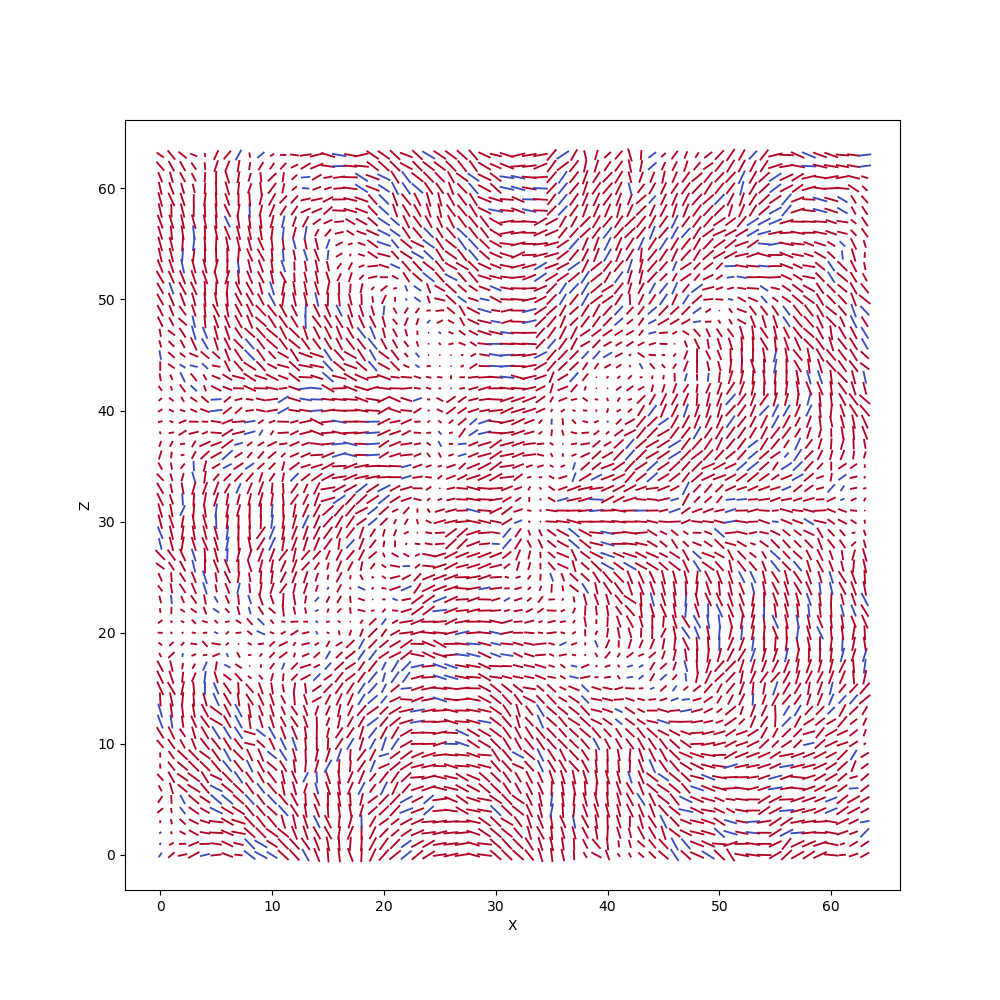

In [20]:
print(len(datafiles))
datafile = datafiles[200] #242
print(datafile)
data = np.load(datafile)
ni,nj,nk = data['nx'].shape
X,Z = np.meshgrid(np.arange(0,ni),np.arange(0,nk))
mp = int(np.floor(nj/2))
u = data['nx'][:,mp,:]
v = data['ny'][:,mp,:]
w = data['nz'][:,mp,:]
s_color = data['s'][:,mp,:]
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

ax.quiver(X,Z,u,w,s_color,pivot='mid',headlength=0,headwidth=0,headaxislength=0,scale_units='xy',scale=0.75,cmap='coolwarm')
ax.set_xlabel('X')
ax.set_ylabel('Z')
plt.plot()